# Logisitc Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

glass = pd.read_csv('glass.csv')
glass.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:

glass.Type.value_counts().sort_index()


,count
Type,
1,70
2,76
3,17
5,13
6,9
7,29


In [3]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()


,count
household,
0,163
1,51


In [4]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household


Question 1

In [5]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)

# Define thresholds to try
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

# Evaluate different thresholds
for threshold in thresholds:
    # Convert probabilities to binary predictions using the threshold
    predictions = (probs >= threshold).astype(int)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)

    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")


Threshold: 0.30, Accuracy: 0.81, Precision: 0.79, Recall: 0.69
Threshold: 0.40, Accuracy: 0.74, Precision: 0.78, Recall: 0.44
Threshold: 0.50, Accuracy: 0.74, Precision: 0.86, Recall: 0.38
Threshold: 0.60, Accuracy: 0.74, Precision: 1.00, Recall: 0.31
Threshold: 0.70, Accuracy: 0.70, Precision: 1.00, Recall: 0.19


Question 2

In [6]:
#elements
elements = ['RI','Na','Mg','Si','K','Ca','Ba','Fe']
for ele in elements:
    X= np.array(glass[ele]).reshape(-1,1)
    y = glass.household

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict probabilities
    probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)

    # Define thresholds to try
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

    # Evaluate different thresholds
    for threshold in thresholds:
        # Convert probabilities to binary predictions using the threshold
        predictions = (probs >= threshold).astype(int)

        # Compute evaluation metrics
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)

        print(f"Element:{ele}, Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

Element:RI, Threshold: 0.30, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.40, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.50, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.60, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.70, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Na, Threshold: 0.30, Accuracy: 0.77, Precision: 0.71, Recall: 0.62
Element:Na, Threshold: 0.40, Accuracy: 0.81, Precision: 0.83, Recall: 0.62
Element:Na, Threshold: 0.50, Accuracy: 0.81, Precision: 0.90, Recall: 0.56
Element:Na, Threshold: 0.60, Accuracy: 0.72, Precision: 0.83, Recall: 0.31
Element:Na, Threshold: 0.70, Accuracy: 0.72, Precision: 0.83, Recall: 0.31
Element:Mg, Threshold: 0.30, Accuracy: 0.91, Precision: 0.88, Recall: 0.88
Element:Mg, Threshold: 0.40, Accuracy: 0.84, Precision: 0.85, Recall: 0.69
Element:Mg, Threshold: 0.50, Accuracy: 0.84, Precision: 0.85, Recall: 0.69
Element:Mg, Threshold: 0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

Question 3

In [7]:
# Drop the target variable from the features
X = glass.drop(columns=['Type', 'household'])

# Target variable
y = glass['household']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8837209302325582


Question 4

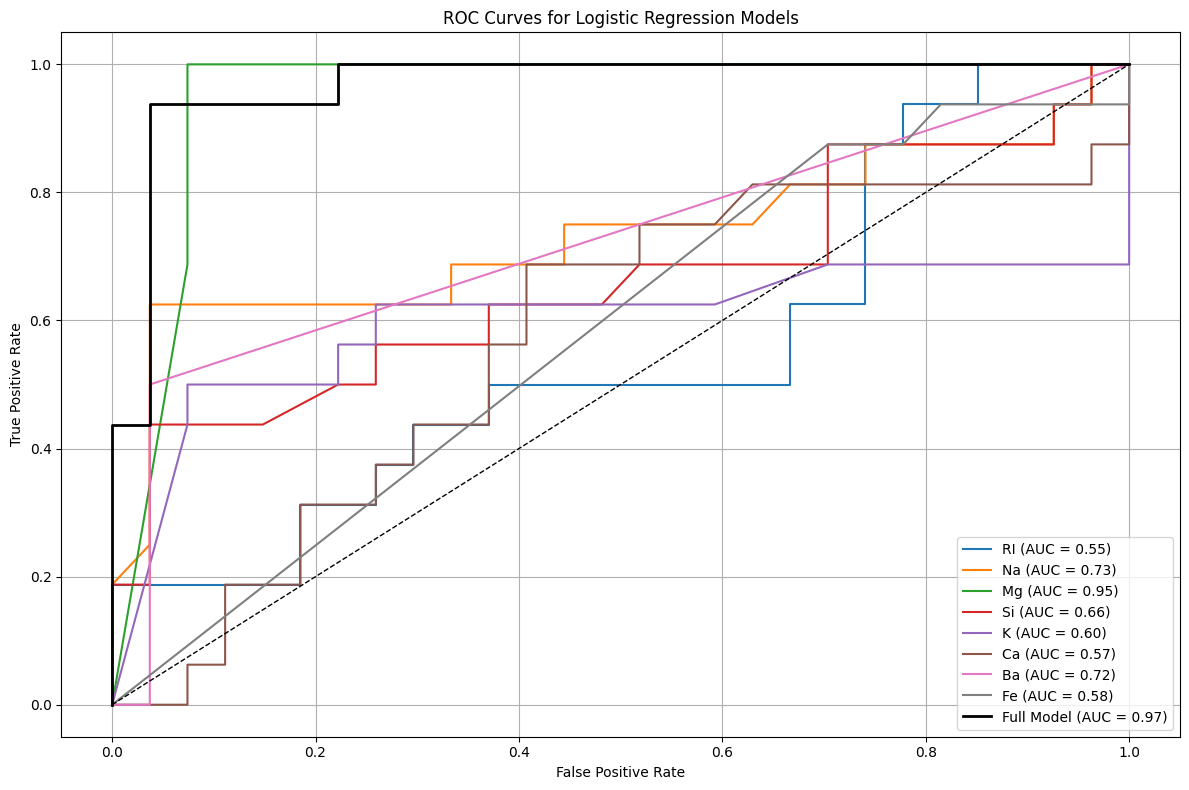

In [8]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12, 8))

# 1. ROC curves for individual element-based models
for ele in elements:
    X = np.array(glass[ele]).reshape(-1, 1)
    y = glass.household

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    probs = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{ele} (AUC = {roc_auc:.2f})')

# 2. ROC curve for full pipeline model
X = glass.drop(columns=['Type', 'household'])
y = glass['household']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reusing preprocessor and pipeline clf from before
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Full Model (AUC = {roc_auc:.2f})', linewidth=2, color='black')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


# Clustering

In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [10]:

# Check out the dataset and our target values
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)



Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


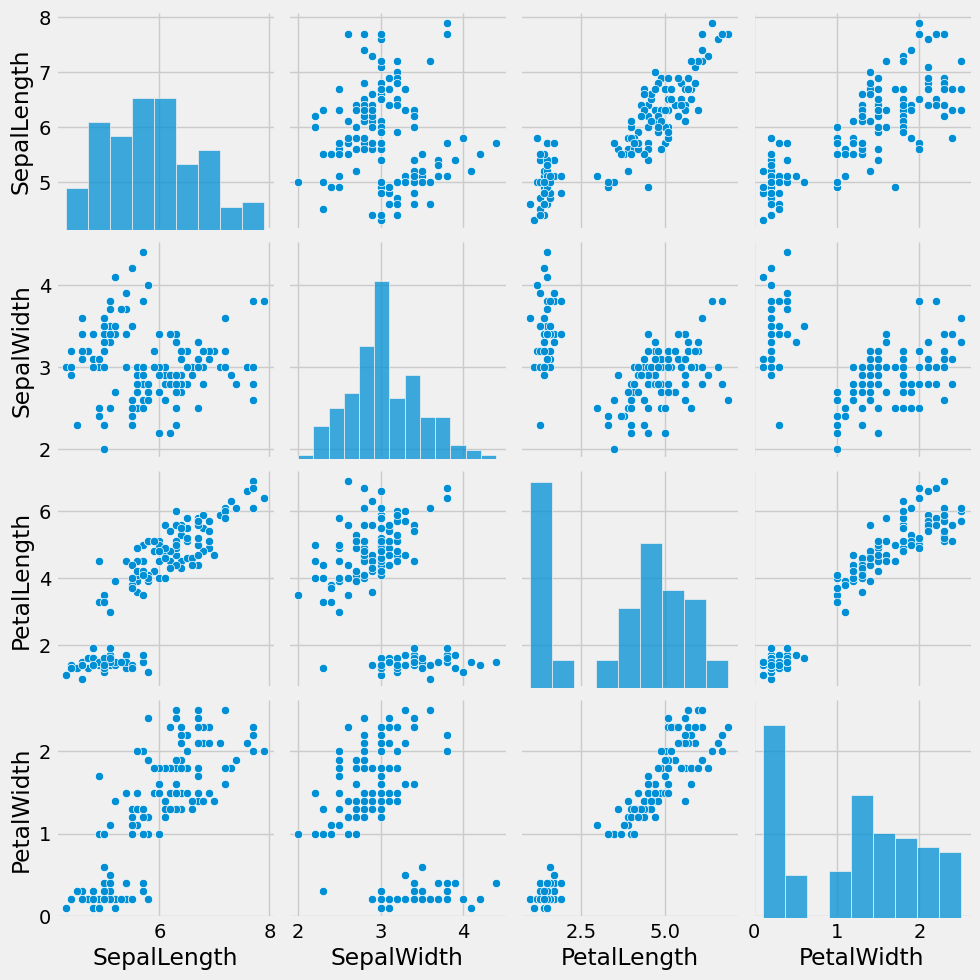

In [11]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

In [12]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

In [13]:

pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [14]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [16]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_


In [17]:

print(labels,centroids)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0] [[0.545      0.36333333 0.6620339  0.65666667]
 [0.19611111 0.59083333 0.07864407 0.06      ]]


In [18]:

metrics.silhouette_score(X_scaled, labels, metric='euclidean')

np.float64(0.6294675561906644)

In [19]:
score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  score.append(metrics.silhouette_score(X_scaled, labels, metric='euclidean'))

Text(0, 0.5, 'Score')

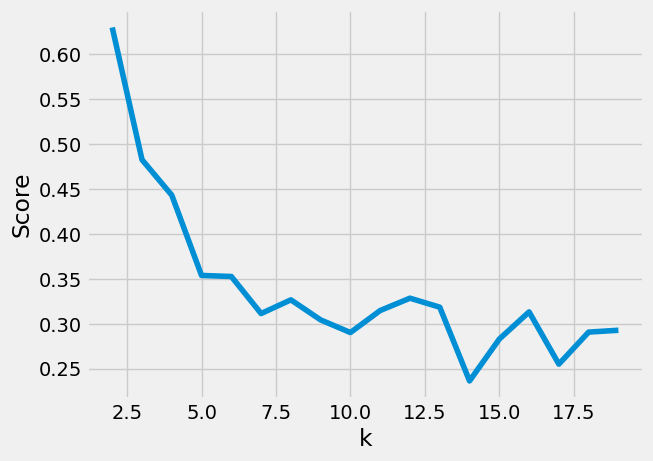

In [20]:
plt.plot(list(range(2,20)),score)
plt.xlabel('k')
plt.ylabel('Score')

In [21]:
inertia_score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  inertia_score.append(inertia)

Text(0, 0.5, 'Inertia')

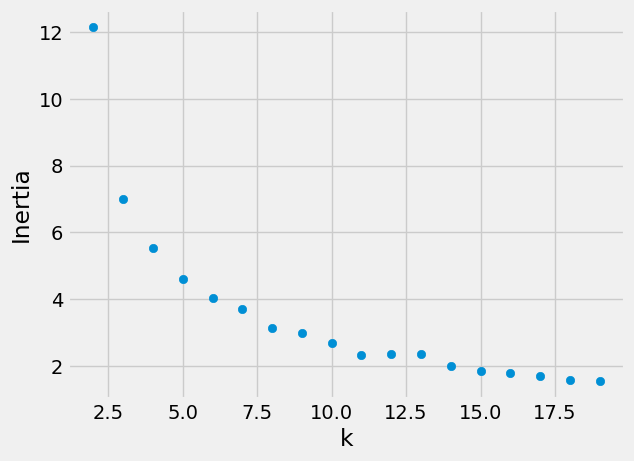

In [22]:
plt.scatter(list(range(2,20)),inertia_score)
plt.xlabel('k')
plt.ylabel('Inertia')


In [23]:
df['label'] = labels
df.head()



,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,15
1,4.9,3.0,1.4,0.2,Iris-setosa,5
2,4.7,3.2,1.3,0.2,Iris-setosa,5
3,4.6,3.1,1.5,0.2,Iris-setosa,5
4,5.0,3.6,1.4,0.2,Iris-setosa,15


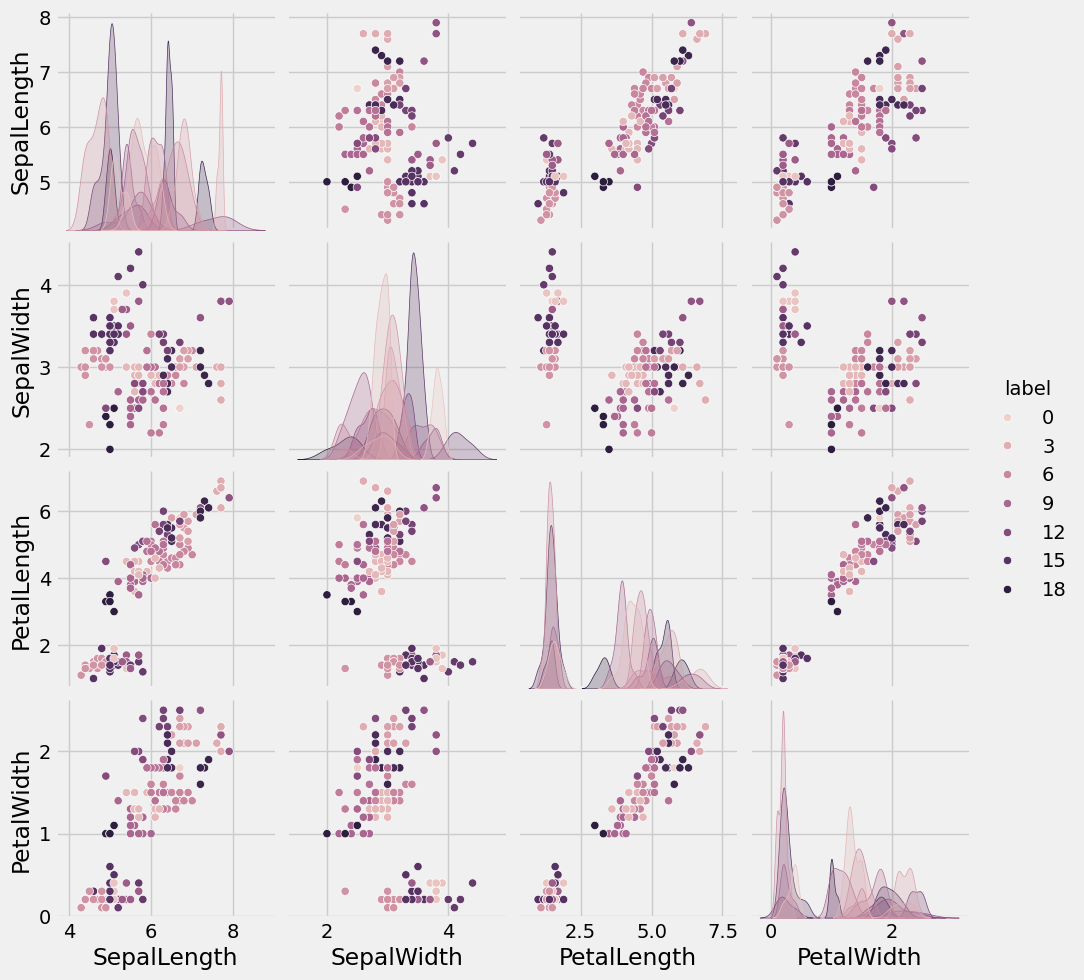

In [24]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

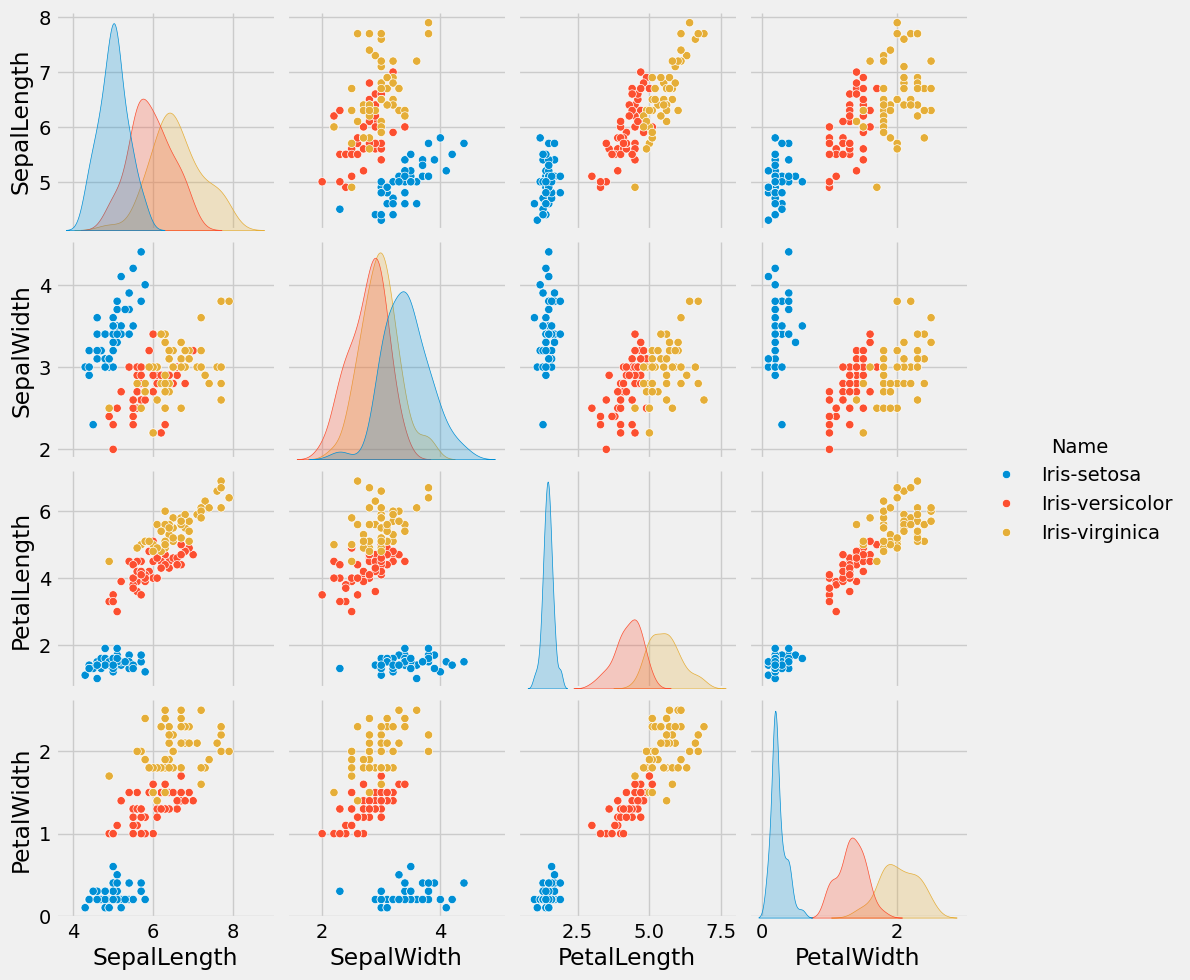

In [25]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')

# Questions :



**How do the inertia and silhouette scores change?**


**Answer :**
- Inertia:
Always decreases as k increases.
This is expected because more clusters mean each one has fewer points, so the points are closer to their centroids.
However, after a certain point, the rate of decrease slows down—this is called the elbow. That point is often a good candidate for the optimal k.

- Silhouette Score:
Measures how distinct the clusters are (higher is better).
Typically, it peaks at the value of k where clusters are dense and well-separated.
If k is too small, clusters mix classes.
If k is too large, you get tight but overly fragmented clusters, which also lowers the score.

**What if you don't scale your features?**

**Answer :**

If you skip scaling:

Features with larger ranges (like cm vs mm) will dominate distance calculations.

KMeans is distance-based, so it will give biased clusters, heavily influenced by those dominant features.

Results will likely be misleading, with lower silhouette scores and a different “optimal” k.



**Is there a 'right' k? Why or why not?**

**Answer:**
There is no single "right" k, but:

The elbow point in the inertia plot is a practical heuristic.

The peak silhouette score can also indicate a good k, especially if it aligns with the elbow.
